In [1]:
#Read Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','notebook','grid'])

<IPython.core.display.Javascript object>


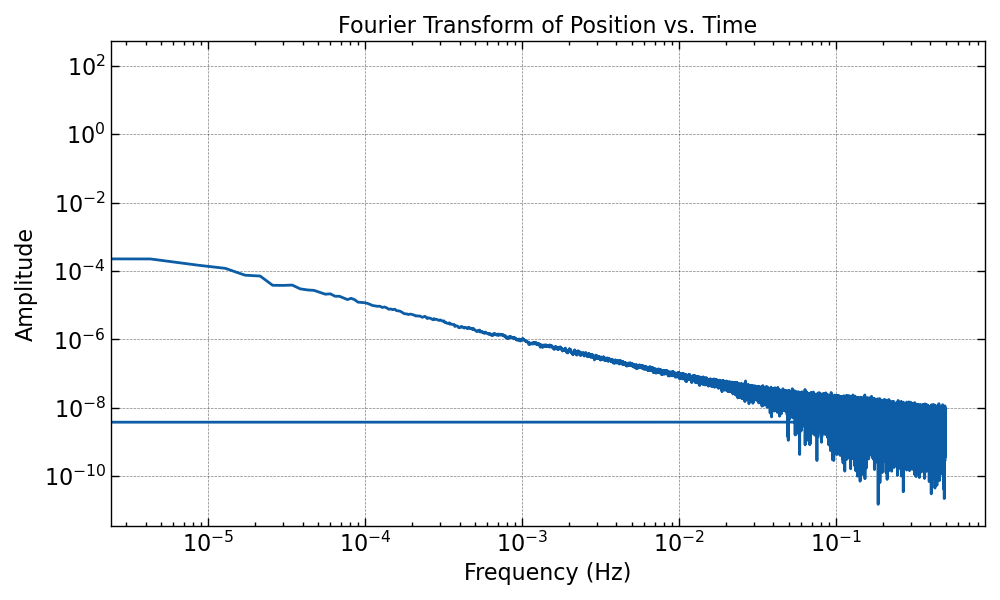

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib Notebook

# Load data from the CSV file
data = pd.read_csv("Experiment_outer_16_02_24_IDS+BME680_position.csv")

# Extract Position and create the time vector
position = data["Position (cm)"]
date_time = data["Date"] + " " + data["Time"]
date_time = pd.to_datetime(date_time, format="%Y-%m-%d %H:%M:%S")
time = (date_time - date_time[0]).dt.total_seconds().values  # Convert to seconds

# Compute the Fourier Transform
position_fft = np.fft.fft(position)
position_fft_freq = np.fft.fftfreq(len(time), time[1] - time[0])

# Create the Fourier Transform plot
plt.figure(figsize=(10, 6))
plt.plot(position_fft_freq, 2.0/len(position) * np.abs(position_fft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xscale('log')
plt.yscale('log')
plt.title("Fourier Transform of Position vs. Time")
plt.grid(True)
# plt.xlim(0, 0.5)  # Display positive frequencies only (up to Nyquist frequency)

plt.tight_layout()
plt.show()

C:\Users\biswa\AppData\Local\Temp\ipykernel_26600\2771829898.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv',parse_dates=[['Date', 'Time']],dayfirst=True,


<IPython.core.display.Javascript object>


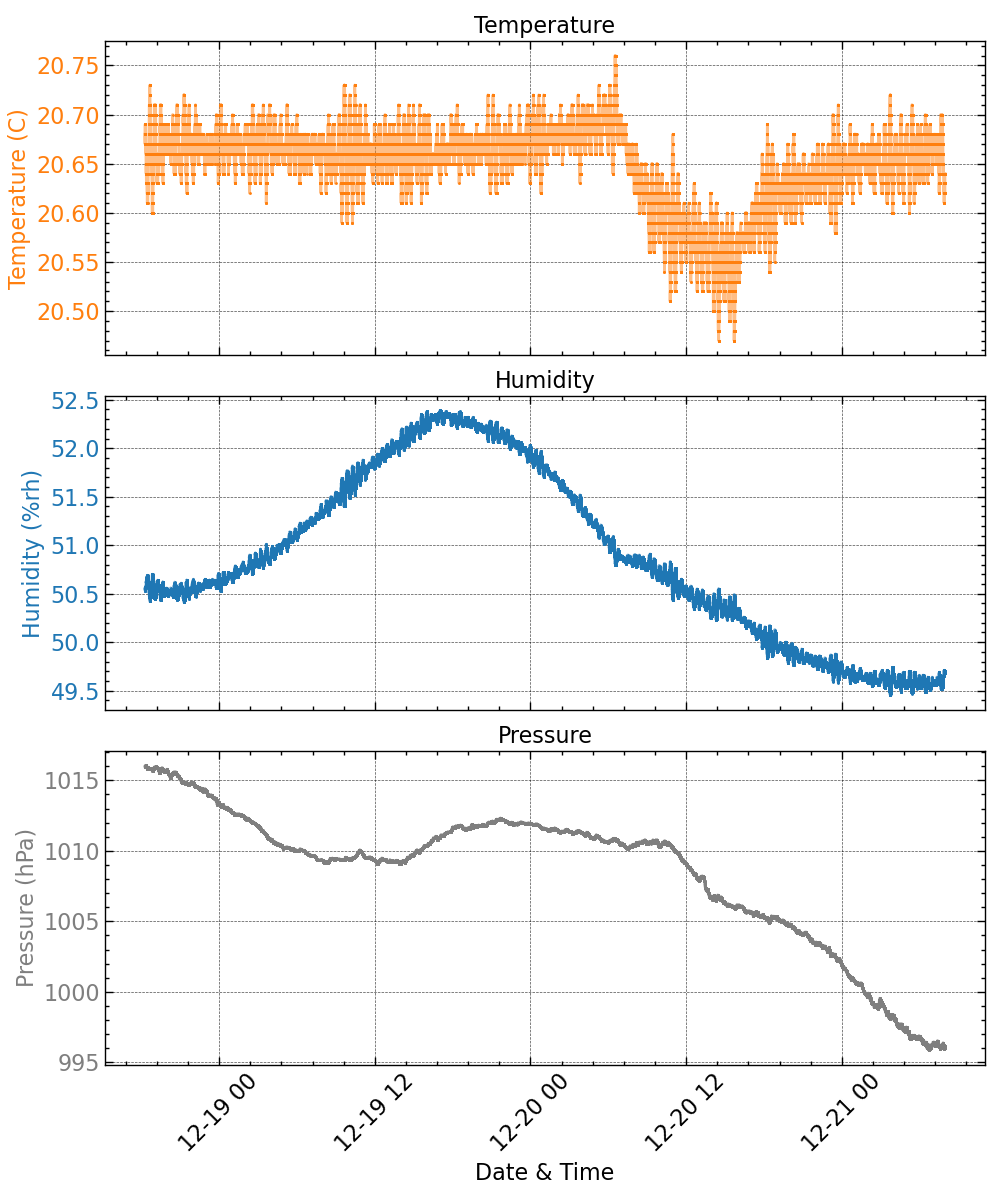

In [4]:
# Read the CSV file into a pandas DataFrame, skipping lines with errors
df = pd.read_csv('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv',parse_dates=[['Date', 'Time']],dayfirst=True,
                 error_bad_lines=False)

# Set the desired start time
start_time = pd.to_datetime('18/12/2023 18:16:54.868', format='%d/%m/%Y %H:%M:%S.%f')

# Filter the DataFrame based on the start time
df = df[df['Date_Time'] >= start_time]

# Create subplots with shared x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Temperature on the first subplot
ax1.set_ylabel('Temperature (C)', color='tab:orange')
ax1.scatter(df['Date_Time'], df['Temperature(C)'], color='tab:orange', label='Temperature', s=1)
ax1.plot(df['Date_Time'], df['Temperature(C)'], linestyle='-', color='tab:orange', alpha=0.5)
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Temperature')

# Plot Humidity on the second subplot
ax2.set_ylabel('Humidity (%rh)', color='tab:blue')
ax2.scatter(df['Date_Time'], df['Humidity(%rh)'], color='tab:blue', label='Humidity', s=1)
ax2.plot(df['Date_Time'], df['Humidity(%rh)'], linestyle='-', color='tab:blue', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Humidity')

# Plot Pressure on the third subplot
ax3.set_xlabel('Date & Time')
ax3.set_ylabel('Pressure (hPa)', color='tab:grey')
ax3.scatter(df['Date_Time'], df['Pressure(hPa)'], color='tab:grey', label='Pressure', s=1)
ax3.plot(df['Date_Time'], df['Pressure(hPa)'], linestyle='-', color='tab:grey', alpha=0.5)
ax3.tick_params(axis='y', labelcolor='tab:grey')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Pressure')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_880\96226233.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv',parse_dates=[['Date', 'Time']],dayfirst=True,


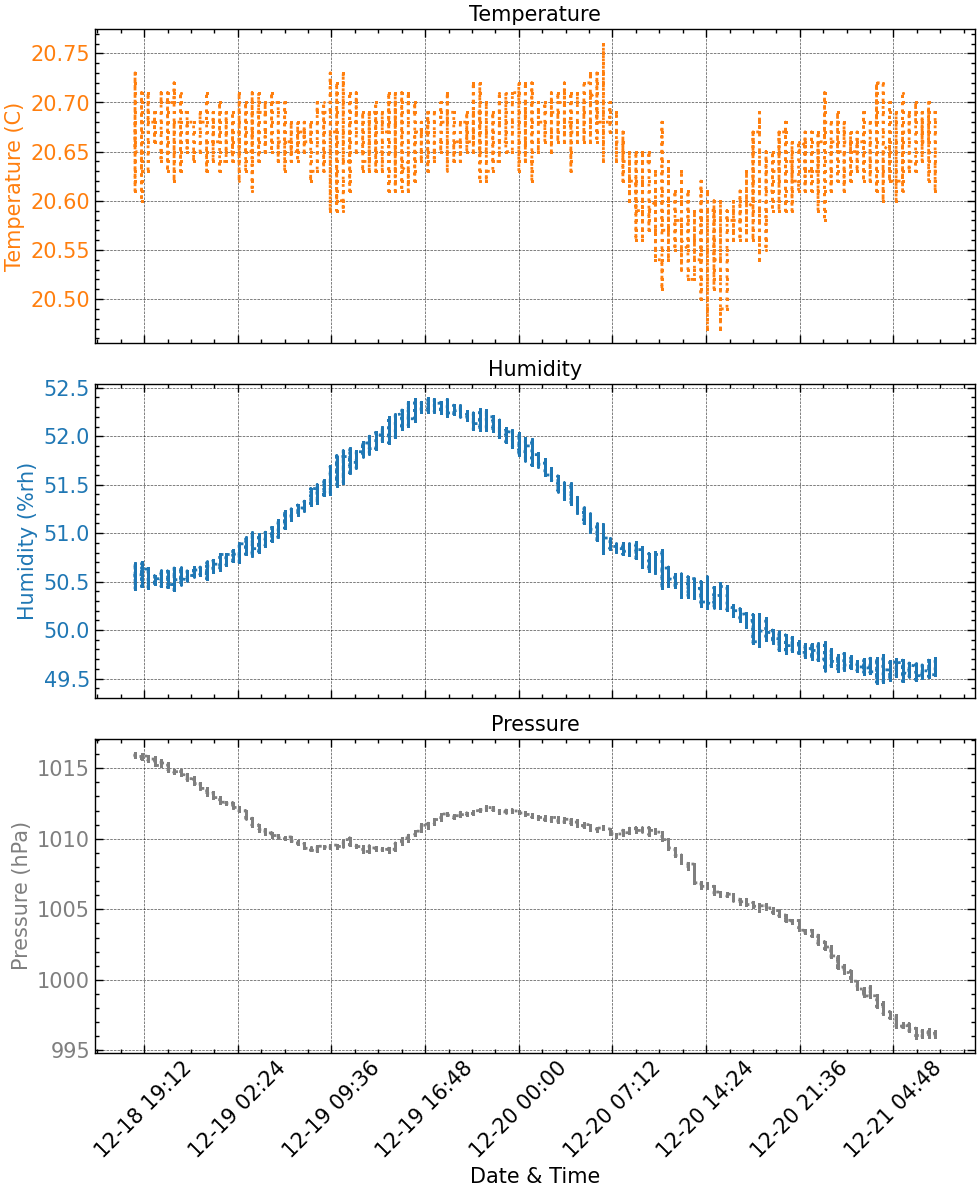

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Read the CSV file into a pandas DataFrame, skipping lines with errors
df = pd.read_csv('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv',parse_dates=[['Date', 'Time']],dayfirst=True,
                 error_bad_lines=False)

# Set the desired start time
start_time = pd.to_datetime('18/12/2023 18:16:54.868', format='%d/%m/%Y %H:%M:%S.%f')

# Filter the DataFrame based on the start time
df = df[df['Date_Time'] >= start_time]

# Binning the data into 30-minute intervals
df['Date_Time_binned'] = df['Date_Time'].dt.round('30min')

# Create subplots with shared x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Temperature on the first subplot
ax1.set_ylabel('Temperature (C)', color='tab:orange')
ax1.scatter(df['Date_Time_binned'], df['Temperature(C)'], color='tab:orange', label='Temperature', s=1)
ax1.plot(df['Date_Time_binned'], df['Temperature(C)'], linestyle='dotted', color='tab:orange', alpha=1)
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Temperature')

# Plot Humidity on the second subplot
ax2.set_ylabel('Humidity (%rh)', color='tab:blue')
ax2.scatter(df['Date_Time_binned'], df['Humidity(%rh)'], color='tab:blue', label='Humidity', s=1)
ax2.plot(df['Date_Time_binned'], df['Humidity(%rh)'], linestyle='dotted', color='tab:blue', alpha=1)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Humidity')

# Plot Pressure on the third subplot
ax3.set_xlabel('Date & Time')
ax3.set_ylabel('Pressure (hPa)', color='tab:grey')
ax3.scatter(df['Date_Time_binned'], df['Pressure(hPa)'], color='tab:grey', label='Pressure', s=1)
ax3.plot(df['Date_Time_binned'], df['Pressure(hPa)'], linestyle='dotted', color='tab:grey', alpha=1)
ax3.tick_params(axis='y', labelcolor='tab:grey')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Pressure')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Format x-axis labels for better visibility
date_form = DateFormatter("%m-%d %H:%M")
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(date_form)
    ax.tick_params(axis='x', labelrotation=45)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of x-axis ticks as needed

# Increase text size for better visibility
for ax in [ax1, ax2, ax3]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

# Show the plot
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_26600\3041980350.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv', parse_dates=[['Date', 'Time']],


<IPython.core.display.Javascript object>


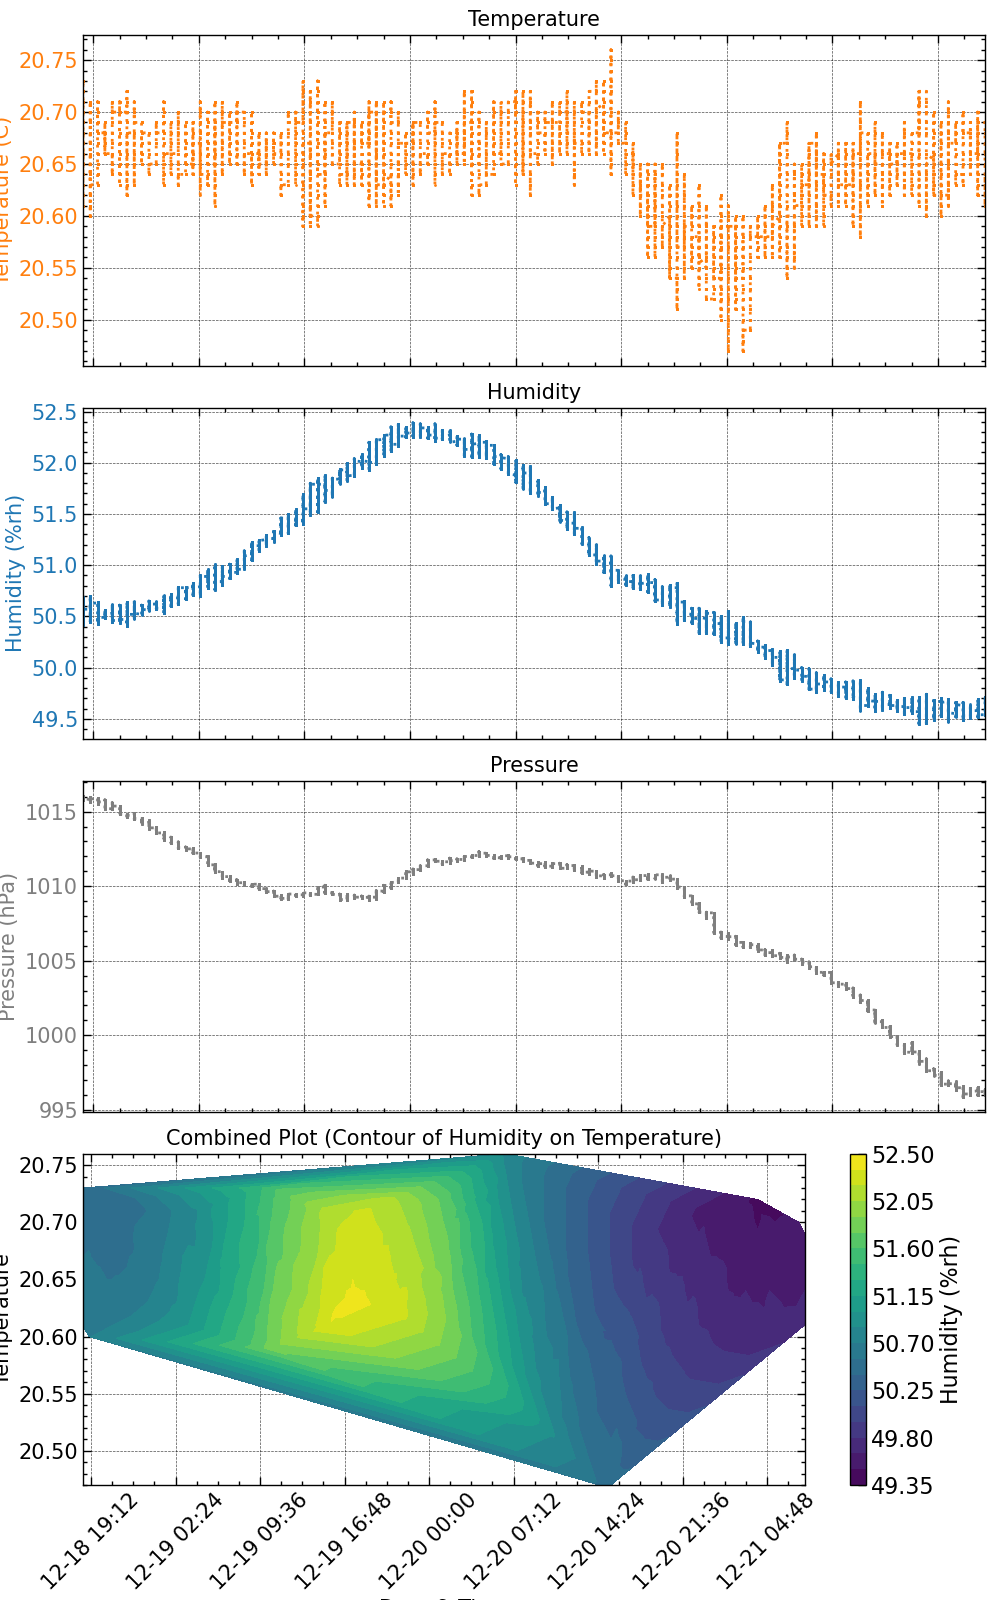

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Read the CSV file into a pandas DataFrame, skipping lines with errors
df = pd.read_csv('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv', parse_dates=[['Date', 'Time']],
                 dayfirst=True, error_bad_lines=False)

# Set the desired start time
start_time = pd.to_datetime('18/12/2023 18:16:54.868', format='%d/%m/%Y %H:%M:%S.%f')

# Filter the DataFrame based on the start time
df = df[df['Date_Time'] >= start_time]

# Binning the data into 30-minute intervals
df['Date_Time_binned'] = df['Date_Time'].dt.round('30min')

# Create subplots with shared x-axis
fig, (ax1, ax2, ax3, ax_combined) = plt.subplots(4, 1, figsize=(10, 16), sharex=True)

# Plot Temperature on the first subplot
ax1.set_ylabel('Temperature (C)', color='tab:orange')
ax1.scatter(df['Date_Time_binned'], df['Temperature(C)'], color='tab:orange', label='Temperature', s=1)
ax1.plot(df['Date_Time_binned'], df['Temperature(C)'], linestyle='dotted', color='tab:orange', alpha=1)
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Temperature')

# Plot Humidity on the second subplot
ax2.set_ylabel('Humidity (%rh)', color='tab:blue')
ax2.scatter(df['Date_Time_binned'], df['Humidity(%rh)'], color='tab:blue', label='Humidity', s=1)
ax2.plot(df['Date_Time_binned'], df['Humidity(%rh)'], linestyle='dotted', color='tab:blue', alpha=1)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Humidity')

# Plot Pressure on the third subplot
ax3.set_ylabel('Pressure (hPa)', color='tab:grey')
ax3.scatter(df['Date_Time_binned'], df['Pressure(hPa)'], color='tab:grey', label='Pressure', s=1)
ax3.plot(df['Date_Time_binned'], df['Pressure(hPa)'], linestyle='dotted', color='tab:grey', alpha=1)
ax3.tick_params(axis='y', labelcolor='tab:grey')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Pressure')

# Combine all plots into one using overplot with contours
ax_combined.set_xlabel('Date & Time')
ax_combined.set_ylabel('Temperature')
contour_plot = ax_combined.tricontourf(mdates.date2num(df['Date_Time_binned']), df['Temperature(C)'].values,
                                       df['Humidity(%rh)'].values, levels=20, cmap='viridis')
fig.colorbar(contour_plot, ax=ax_combined, label='Humidity (%rh)')
ax_combined.grid(True, linestyle='--', alpha=0.7)
ax_combined.set_title('Combined Plot (Contour of Humidity on Temperature)')
ax_combined.xaxis.set_major_formatter(date_form)
ax_combined.tick_params(axis='x', labelrotation=45)
ax_combined.xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of x-axis ticks as needed

# Increase text size for better visibility
for ax in [ax1, ax2, ax3, ax_combined]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)


# Show the plot
plt.savefig('Experiment 7i BME680 includes contour.pdf')
plt.tight_layout()
plt.show()


In [10]:
df

,Date_Time,Temperature(C),Pressure(hPa),Humidity(%rh),Date_Time_binned
6552,2023-12-18 18:16:54.868,20.68,1015.98,50.55,2023-12-18 18:30:00
6553,2023-12-18 18:16:55.872,20.67,1015.98,50.55,2023-12-18 18:30:00
6554,2023-12-18 18:16:56.876,20.67,1015.98,50.55,2023-12-18 18:30:00
6555,2023-12-18 18:16:57.880,20.67,1015.98,50.55,2023-12-18 18:30:00
6556,2023-12-18 18:16:58.884,20.67,1015.98,50.55,2023-12-18 18:30:00
...,...,...,...,...,...
227715,2023-12-21 07:57:11.346,20.64,996.16,49.68,2023-12-21 08:00:00
227716,2023-12-21 07:57:12.350,20.64,996.16,49.68,2023-12-21 08:00:00
227717,2023-12-21 07:57:13.354,20.64,996.16,49.68,2023-12-21 08:00:00
227718,2023-12-21 07:57:14.357,20.64,996.15,49.68,2023-12-21 08:00:00


<IPython.core.display.Javascript object>


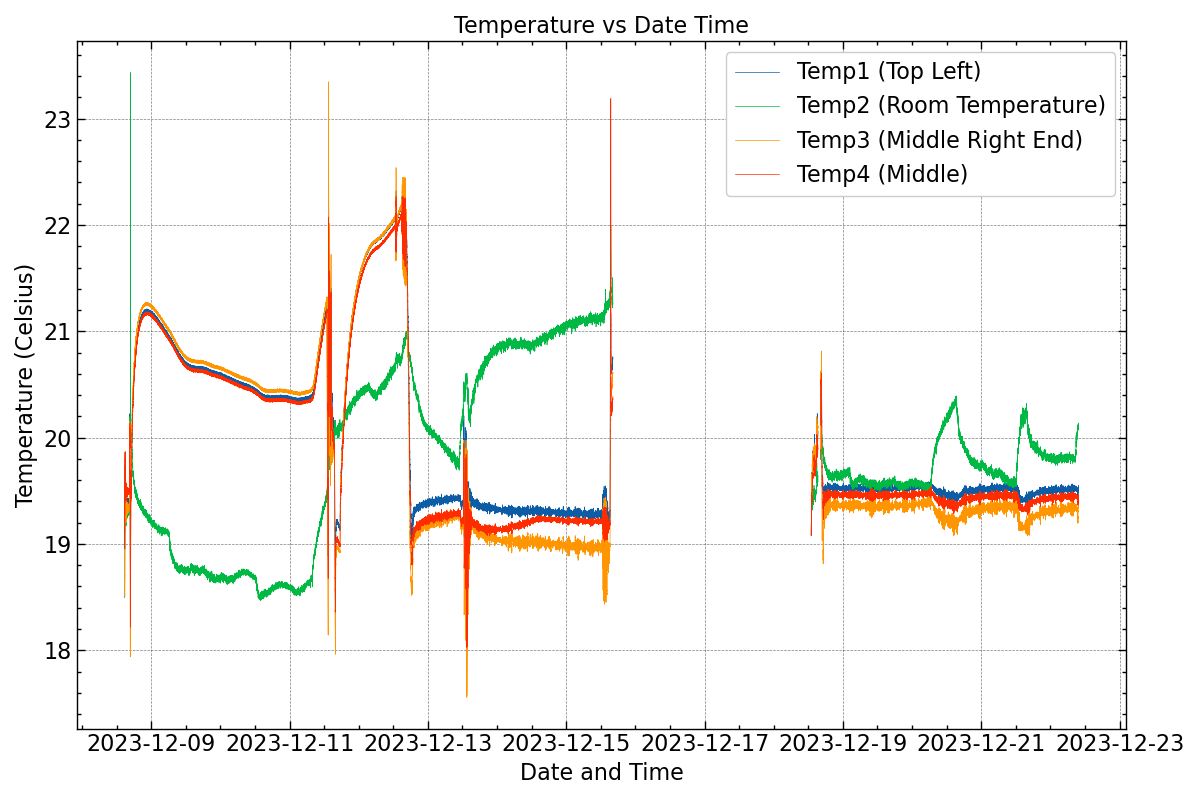

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = 'Temperature_PID_loop_outerbox_analysis.csv'
data = pd.read_csv(file_path, parse_dates=[['Date', 'Time']], dayfirst=True)

# Extract Date_Time and temperature columns
date_time = data['Date_Time']
temp1 = data['Top Left(C)']
temp2 = data['Room_Temperature(C)']
temp3 = data['Middle Right end(C)']
temp4 = data['Middle(C)']

# Plot temperature vs date time
plt.figure(figsize=(12, 8))
plt.plot(date_time, temp1, label='Temp1 (Top Left)', linestyle='-', linewidth=0.5)
plt.plot(date_time, temp2, label='Temp2 (Room Temperature)', linestyle='-', linewidth=0.5)
plt.plot(date_time, temp3, label='Temp3 (Middle Right End)', linestyle='-', linewidth=0.5)
plt.plot(date_time, temp4, label='Temp4 (Middle)', linestyle='-', linewidth=0.5)

# Set labels and title
plt.xlabel('Date and Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature vs Date Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_880\363755250.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Date_Time_Binned'] = pd.cut(data_filtered['Date_Time'], bins=pd.date_range(start=start_time, end=end_time, freq='30T'))
C:\Users\biswa\AppData\Local\Temp\ipykernel_880\363755250.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Date_Time_Binned_Midpoint'] = data_filtered['Date_Time_Binned'].apply(lambda x: x.mid)


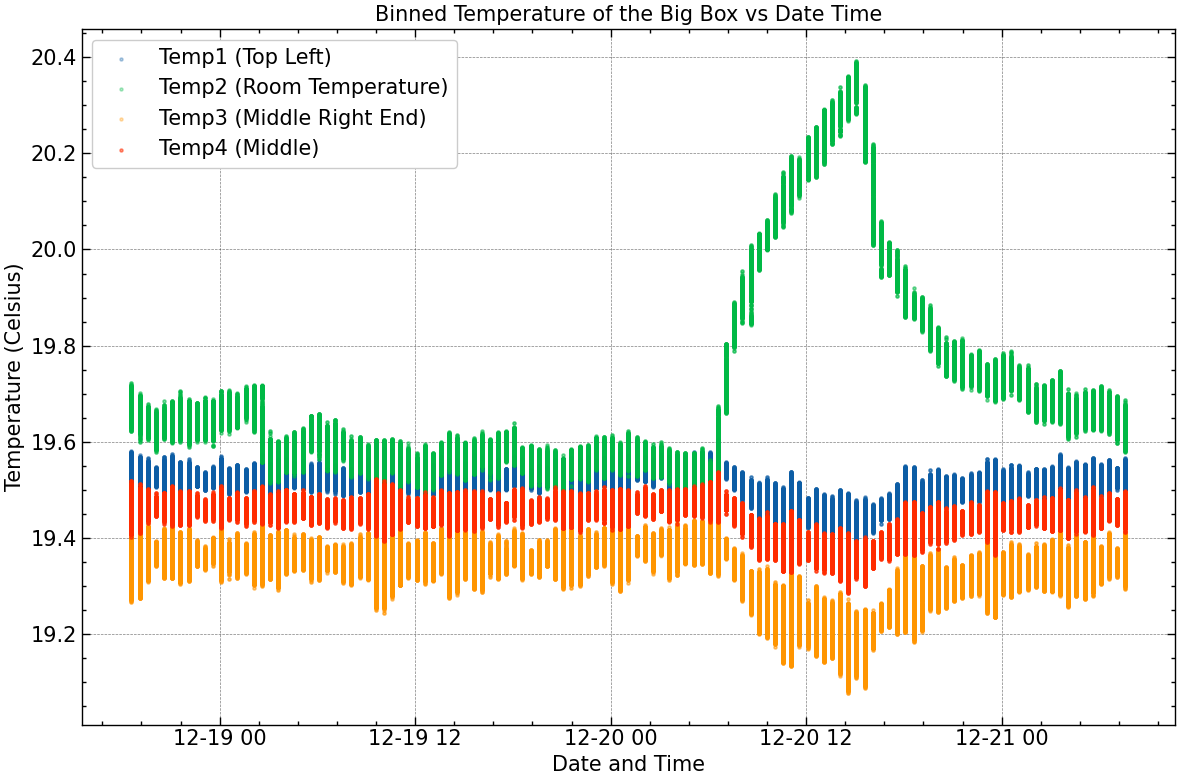

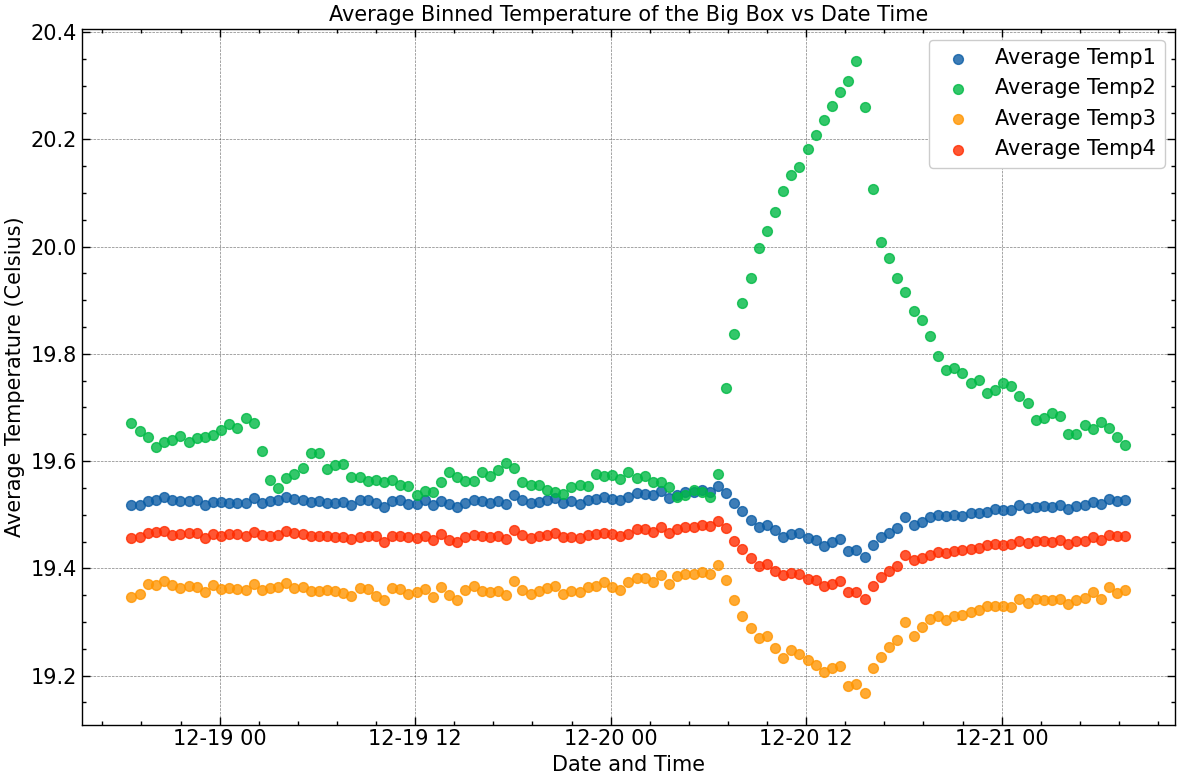

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = 'Temperature_PID_loop_outerbox_analysis.csv'
data = pd.read_csv(file_path, parse_dates=[['Date', 'Time']], dayfirst=True)

# Set the desired start and end times
start_time = pd.to_datetime("2023-12-18 18:20:24.748", format="%Y-%m-%d %H:%M:%S")
end_time = pd.to_datetime("2023-12-21 07:57:15.361", format="%Y-%m-%d %H:%M:%S")

# Filter data based on start and end times
data_filtered = data[(data['Date_Time'] >= start_time) & (data['Date_Time'] <= end_time)]

# Bin the data to 30 minutes
data_filtered['Date_Time_Binned'] = pd.cut(data_filtered['Date_Time'], bins=pd.date_range(start=start_time, end=end_time, freq='30T'))

# Convert interval to its midpoint
data_filtered['Date_Time_Binned_Midpoint'] = data_filtered['Date_Time_Binned'].apply(lambda x: x.mid)

# Extract Date_Time and temperature columns
date_time = data_filtered['Date_Time_Binned_Midpoint']
temp1 = data_filtered['Top Left(C)']
temp2 = data_filtered['Room_Temperature(C)']
temp3 = data_filtered['Middle Right end(C)']
temp4 = data_filtered['Middle(C)']

# Create a scatter plot for the binned temperature
plt.figure(figsize=(12, 8))
plt.scatter(date_time, temp1, label='Temp1 (Top Left)', s=5, alpha=0.3)
plt.scatter(date_time, temp2, label='Temp2 (Room Temperature)', s=5, alpha=0.3)
plt.scatter(date_time, temp3, label='Temp3 (Middle Right End)', s=5, alpha=0.3)
plt.scatter(date_time, temp4, label='Temp4 (Middle)', s=5, alpha=0.5)

# Set labels and title for the binned temperature plot
plt.xlabel('Date and Time', fontsize=15)
plt.ylabel('Temperature (Celsius)', fontsize=15)
plt.title('Binned Temperature of the Big Box vs Date Time', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate average temperature at each binning interval
avg_temp1 = temp1.groupby(date_time).mean()
avg_temp2 = temp2.groupby(date_time).mean()
avg_temp3 = temp3.groupby(date_time).mean()
avg_temp4 = temp4.groupby(date_time).mean()

# Create a scatter plot for the average binned temperature
plt.figure(figsize=(12, 8))
plt.scatter(avg_temp1.index, avg_temp1, label='Average Temp1', s=50, alpha=0.8)
plt.scatter(avg_temp2.index, avg_temp2, label='Average Temp2', s=50, alpha=0.8)
plt.scatter(avg_temp3.index, avg_temp3, label='Average Temp3', s=50, alpha=0.8)
plt.scatter(avg_temp4.index, avg_temp4, label='Average Temp4', s=50, alpha=0.8)

# Set labels and title for the average binned temperature plot
plt.xlabel('Date and Time', fontsize=15)
plt.ylabel('Average Temperature (Celsius)', fontsize=15)
plt.title('Average Binned Temperature of the Big Box vs Date Time', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_880\3901663253.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hours'] = (data_filtered['Date_Time'] - start_time).dt.total_seconds() / 3600
C:\Users\biswa\AppData\Local\Temp\ipykernel_880\3901663253.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hours_Binned'] = pd.cut(data_filtered['Hours'], bins=range(0, int((end_time - start_time).total_seconds() / 3600)))
C:\Users\biswa\AppData\Local\Temp\ipykernel_880\3901663253.py:22

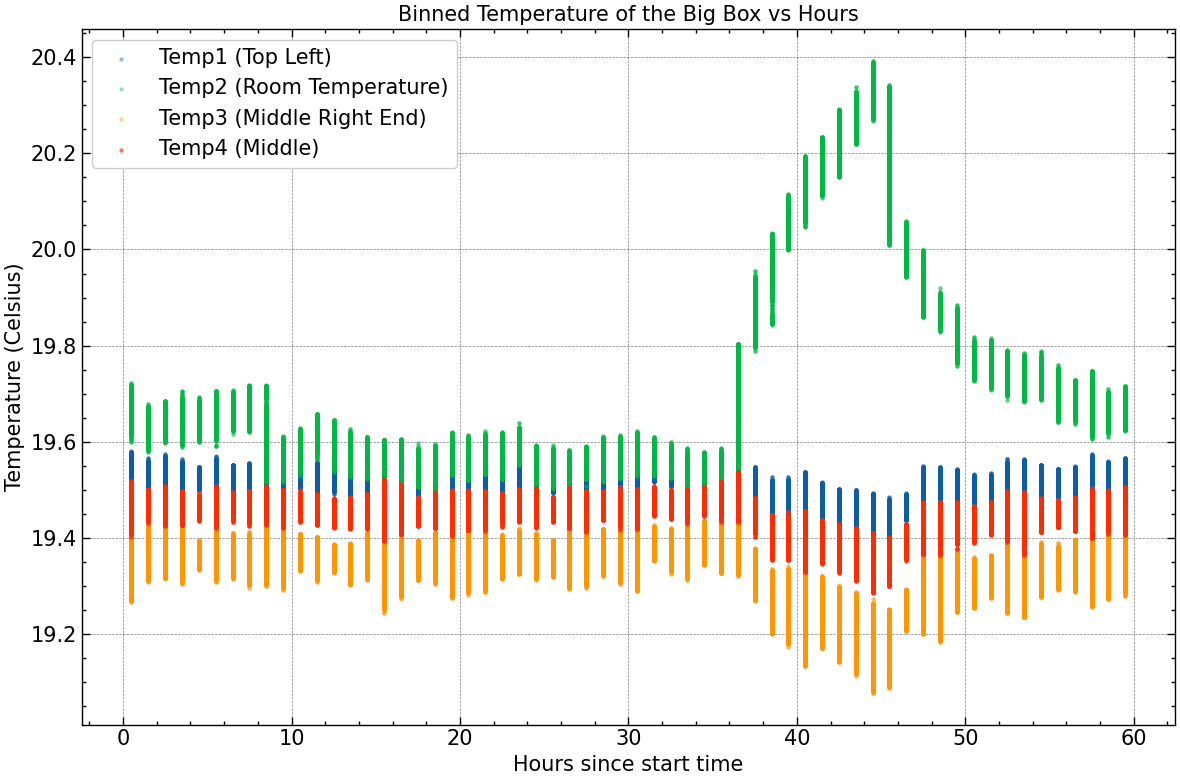

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = 'Temperature_PID_loop_outerbox_analysis.csv'
data = pd.read_csv(file_path, parse_dates=[['Date', 'Time']], dayfirst=True)

# Set the desired start and end times
start_time = pd.to_datetime("2023-12-18 18:20:24.748", format="%Y-%m-%d %H:%M:%S")
end_time = pd.to_datetime("2023-12-21 07:57:15.361", format="%Y-%m-%d %H:%M:%S")

# Filter data based on start and end times
data_filtered = data[(data['Date_Time'] >= start_time) & (data['Date_Time'] <= end_time)]

# Convert Date_Time to hours since the start time
data_filtered['Hours'] = (data_filtered['Date_Time'] - start_time).dt.total_seconds() / 3600

# Bin the data to 1 hour
data_filtered['Hours_Binned'] = pd.cut(data_filtered['Hours'], bins=range(0, int((end_time - start_time).total_seconds() / 3600)))

# Convert the intervals to their midpoints (numerical values)
data_filtered['Hours_Binned_Midpoint'] = data_filtered['Hours_Binned'].apply(lambda x: x.mid)

# Extract Hours and temperature columns
hours = data_filtered['Hours_Binned_Midpoint']
temp1 = data_filtered['Top Left(C)']
temp2 = data_filtered['Room_Temperature(C)']
temp3 = data_filtered['Middle Right end(C)']
temp4 = data_filtered['Middle(C)']

# Create a scatter plot for the binned temperature
plt.figure(figsize=(12, 8))
plt.scatter(hours, temp1, label='Temp1 (Top Left)', s=5, alpha=0.3)
plt.scatter(hours, temp2, label='Temp2 (Room Temperature)', s=5, alpha=0.3)
plt.scatter(hours, temp3, label='Temp3 (Middle Right End)', s=5, alpha=0.3)
plt.scatter(hours, temp4, label='Temp4 (Middle)', s=5, alpha=0.5)

# Set labels and title for the binned temperature plot
plt.xlabel('Hours since start time', fontsize=15)
plt.ylabel('Temperature (Celsius)', fontsize=15)
plt.title('Binned Temperature of the Big Box vs Hours', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


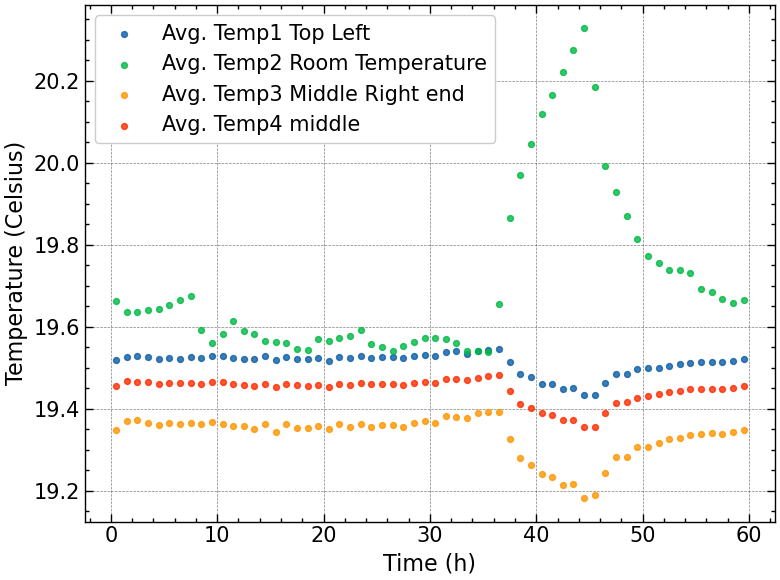

In [5]:
# Calculate average temperature at each binning interval
avg_temp1 = data_filtered.groupby('Hours_Binned_Midpoint')['Top Left(C)'].mean()
avg_temp2 = data_filtered.groupby('Hours_Binned_Midpoint')['Room_Temperature(C)'].mean()
avg_temp3 = data_filtered.groupby('Hours_Binned_Midpoint')['Middle Right end(C)'].mean()
avg_temp4 = data_filtered.groupby('Hours_Binned_Midpoint')['Middle(C)'].mean()

# Create a scatter plot for the average binned temperature
plt.figure(figsize=(8, 6))
plt.scatter(avg_temp1.index, avg_temp1, label='Avg. Temp1 Top Left', s=18, alpha=0.8)
plt.scatter(avg_temp2.index, avg_temp2, label='Avg. Temp2 Room Temperature', s=18, alpha=0.8)
plt.scatter(avg_temp3.index, avg_temp3, label='Avg. Temp3 Middle Right end', s=18, alpha=0.8)
plt.scatter(avg_temp4.index, avg_temp4, label='Avg. Temp4 middle', s=18, alpha=0.8)

# Set labels and title for the average binned temperature plot
plt.xlabel('Time (h)')
plt.ylabel('Temperature (Celsius)')
# plt.title('Average Binned Temperature of the Big Box vs Hours', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('Plot 7i temperature graph.png')
plt.show()


C:\Users\biswa\AppData\Local\Temp\ipykernel_25728\2317042509.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hours'] = (data_filtered['Date_Time'] - start_time).dt.total_seconds() / 3600
C:\Users\biswa\AppData\Local\Temp\ipykernel_25728\2317042509.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hours_Binned'] = pd.cut(data_filtered['Hours'], bins=range(0, int((end_time - start_time).total_seconds() / 3600)))
C:\Users\biswa\AppData\Local\Temp\ipykernel_25728\2317042509

<IPython.core.display.Javascript object>


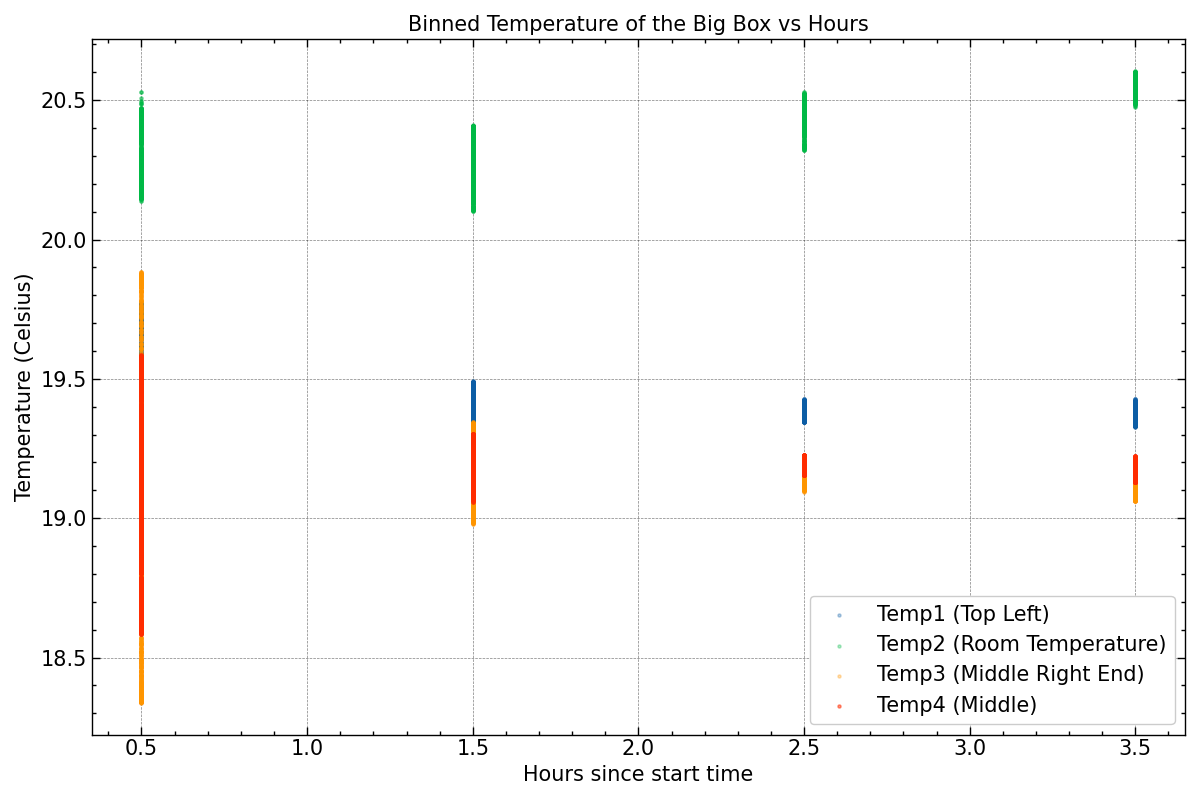

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Load data from the CSV file
file_path = 'Temperature_PID_loop_outerbox_analysis1.csv'
data = pd.read_csv(file_path, parse_dates=[['Date', 'Time']], dayfirst=True)

# Set the desired start and end times
start_time = pd.to_datetime("2023-12-13 13:37:38", format="%Y-%m-%d %H:%M:%S")
end_time = pd.to_datetime("2023-12-13 19:00:00", format="%Y-%m-%d %H:%M:%S")

# Filter data based on start and end times
data_filtered = data[(data['Date_Time'] >= start_time) & (data['Date_Time'] <= end_time)]

# Convert Date_Time to hours since the start time
data_filtered['Hours'] = (data_filtered['Date_Time'] - start_time).dt.total_seconds() / 3600

# Bin the data to 1 hour
data_filtered['Hours_Binned'] = pd.cut(data_filtered['Hours'], bins=range(0, int((end_time - start_time).total_seconds() / 3600)))

# Convert the intervals to their midpoints (numerical values)
data_filtered['Hours_Binned_Midpoint'] = data_filtered['Hours_Binned'].apply(lambda x: x.mid)

# Extract Hours and temperature columns
hours = data_filtered['Hours_Binned_Midpoint']
temp1 = data_filtered['Top Left(C)']
temp2 = data_filtered['Room_Temperature(C)']
temp3 = data_filtered['Middle Right end(C)']
temp4 = data_filtered['Middle(C)']

# Create a scatter plot for the binned temperature
plt.figure(figsize=(12, 8))
plt.scatter(hours, temp1, label='Temp1 (Top Left)', s=5, alpha=0.3)
plt.scatter(hours, temp2, label='Temp2 (Room Temperature)', s=5, alpha=0.3)
plt.scatter(hours, temp3, label='Temp3 (Middle Right End)', s=5, alpha=0.3)
plt.scatter(hours, temp4, label='Temp4 (Middle)', s=5, alpha=0.5)

# Set labels and title for the binned temperature plot
plt.xlabel('Hours since start time', fontsize=15)
plt.ylabel('Temperature (Celsius)', fontsize=15)
plt.title('Binned Temperature of the Big Box vs Hours', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


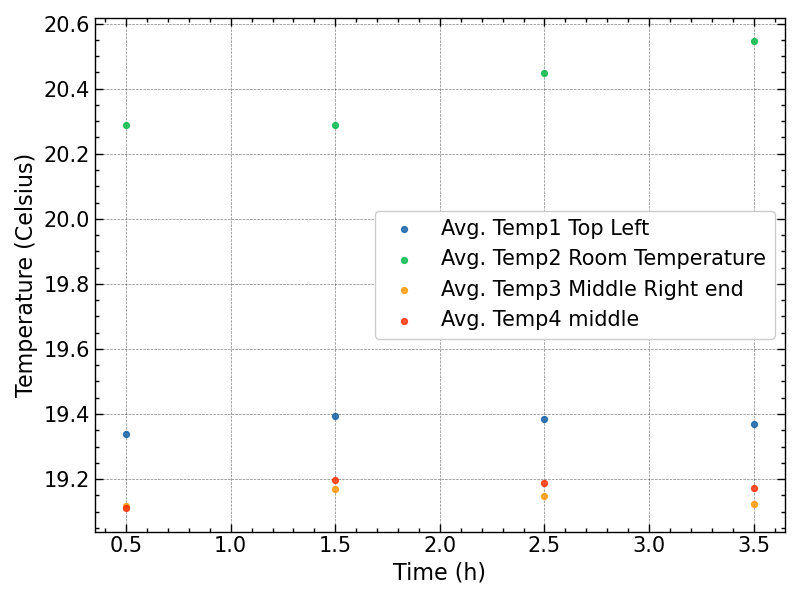

In [7]:
# Calculate average temperature at each binning interval
avg_temp1 = data_filtered.groupby('Hours_Binned_Midpoint')['Top Left(C)'].mean()
avg_temp2 = data_filtered.groupby('Hours_Binned_Midpoint')['Room_Temperature(C)'].mean()
avg_temp3 = data_filtered.groupby('Hours_Binned_Midpoint')['Middle Right end(C)'].mean()
avg_temp4 = data_filtered.groupby('Hours_Binned_Midpoint')['Middle(C)'].mean()

# Create a scatter plot for the average binned temperature
plt.figure(figsize=(8, 6))
plt.scatter(avg_temp1.index, avg_temp1, label='Avg. Temp1 Top Left', s=18, alpha=0.8)
plt.scatter(avg_temp2.index, avg_temp2, label='Avg. Temp2 Room Temperature', s=18, alpha=0.8)
plt.scatter(avg_temp3.index, avg_temp3, label='Avg. Temp3 Middle Right end', s=18, alpha=0.8)
plt.scatter(avg_temp4.index, avg_temp4, label='Avg. Temp4 middle', s=18, alpha=0.8)

# Set labels and title for the average binned temperature plot
plt.xlabel('Time (h)')
plt.ylabel('Temperature (Celsius)')
# plt.title('Average Binned Temperature of the Big Box vs Hours', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
# plt.savefig('Plot 7i temperature graph.png')
plt.show()


<IPython.core.display.Javascript object>


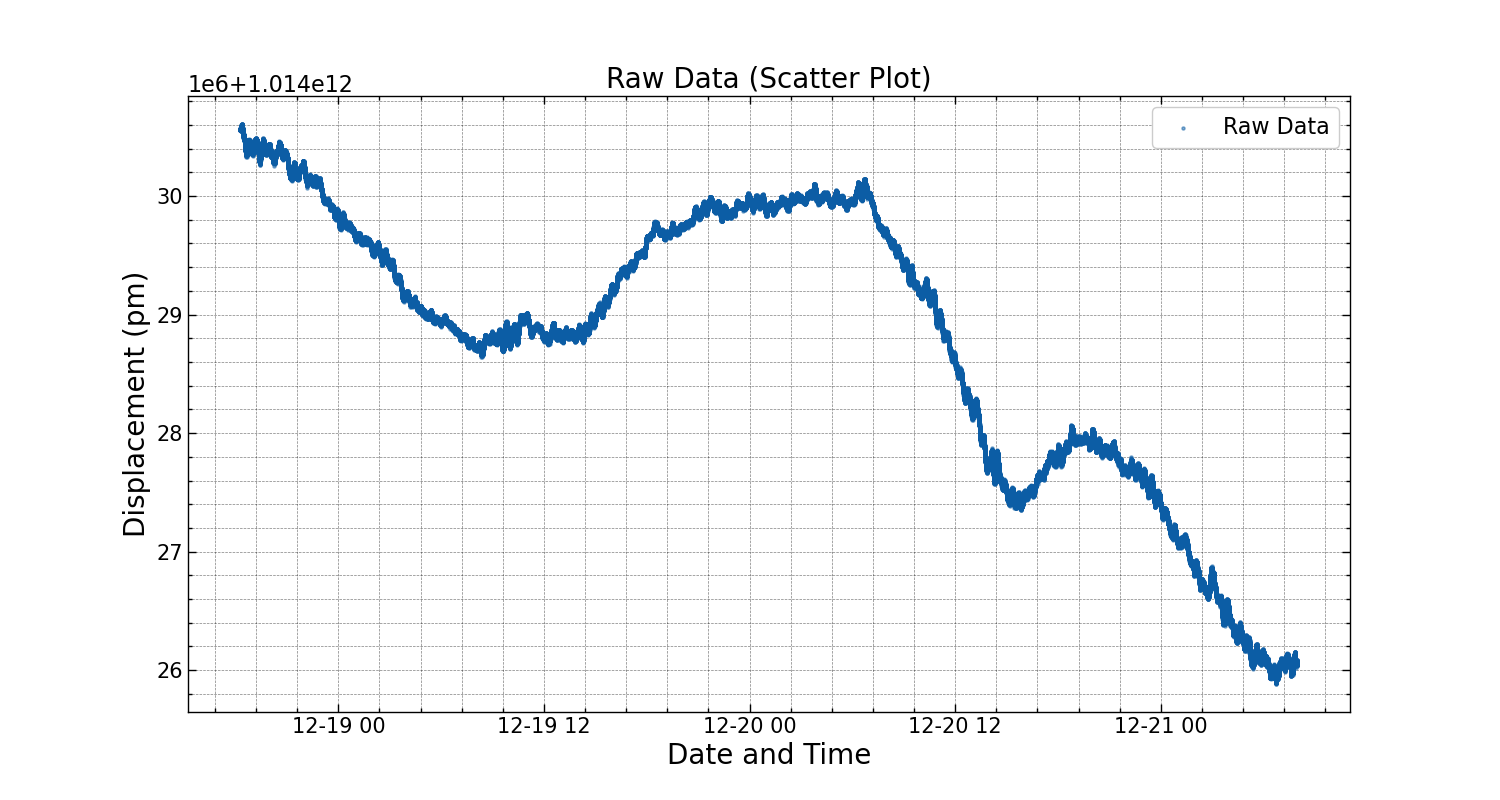

<IPython.core.display.Javascript object>


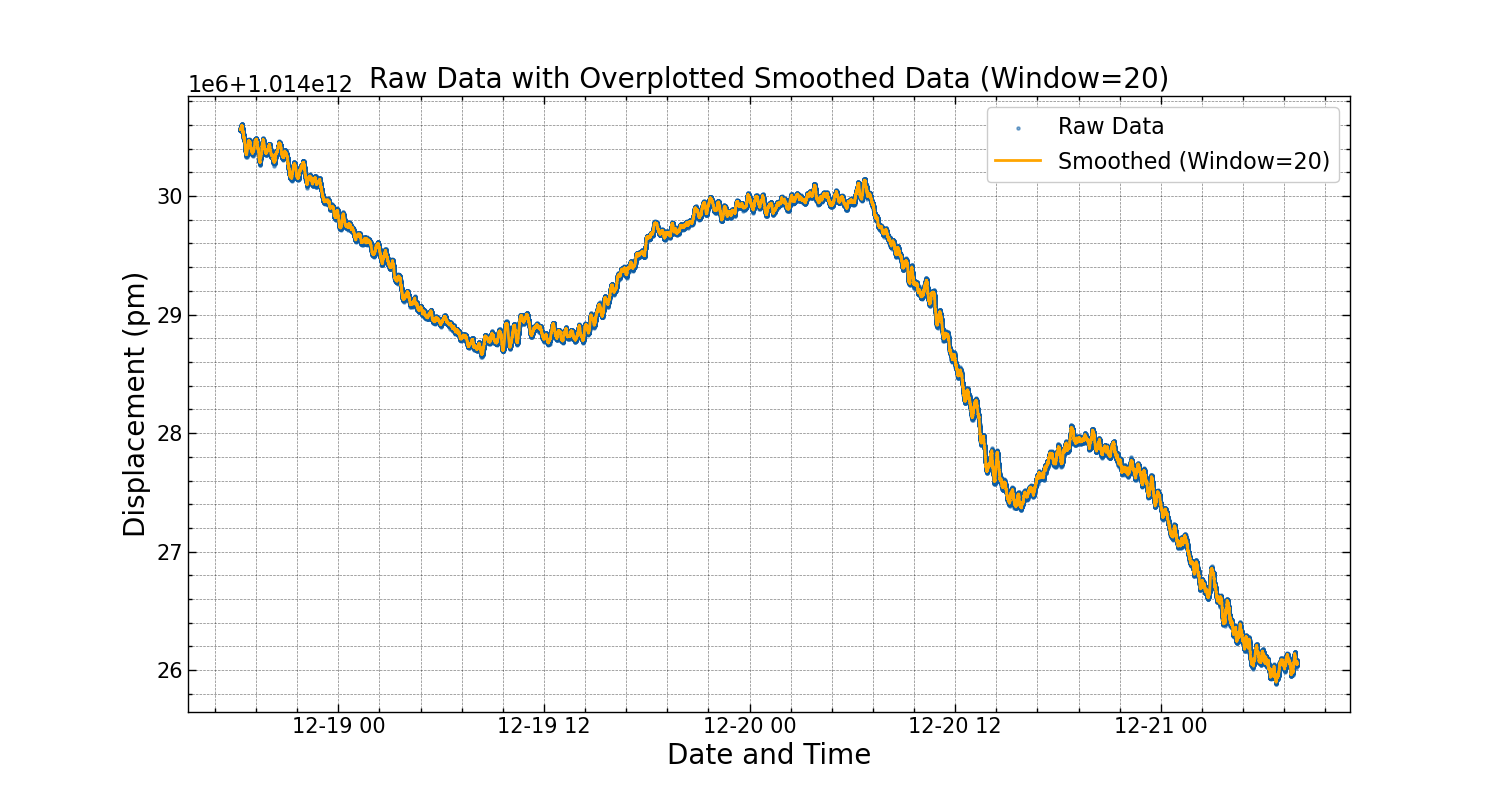

<IPython.core.display.Javascript object>


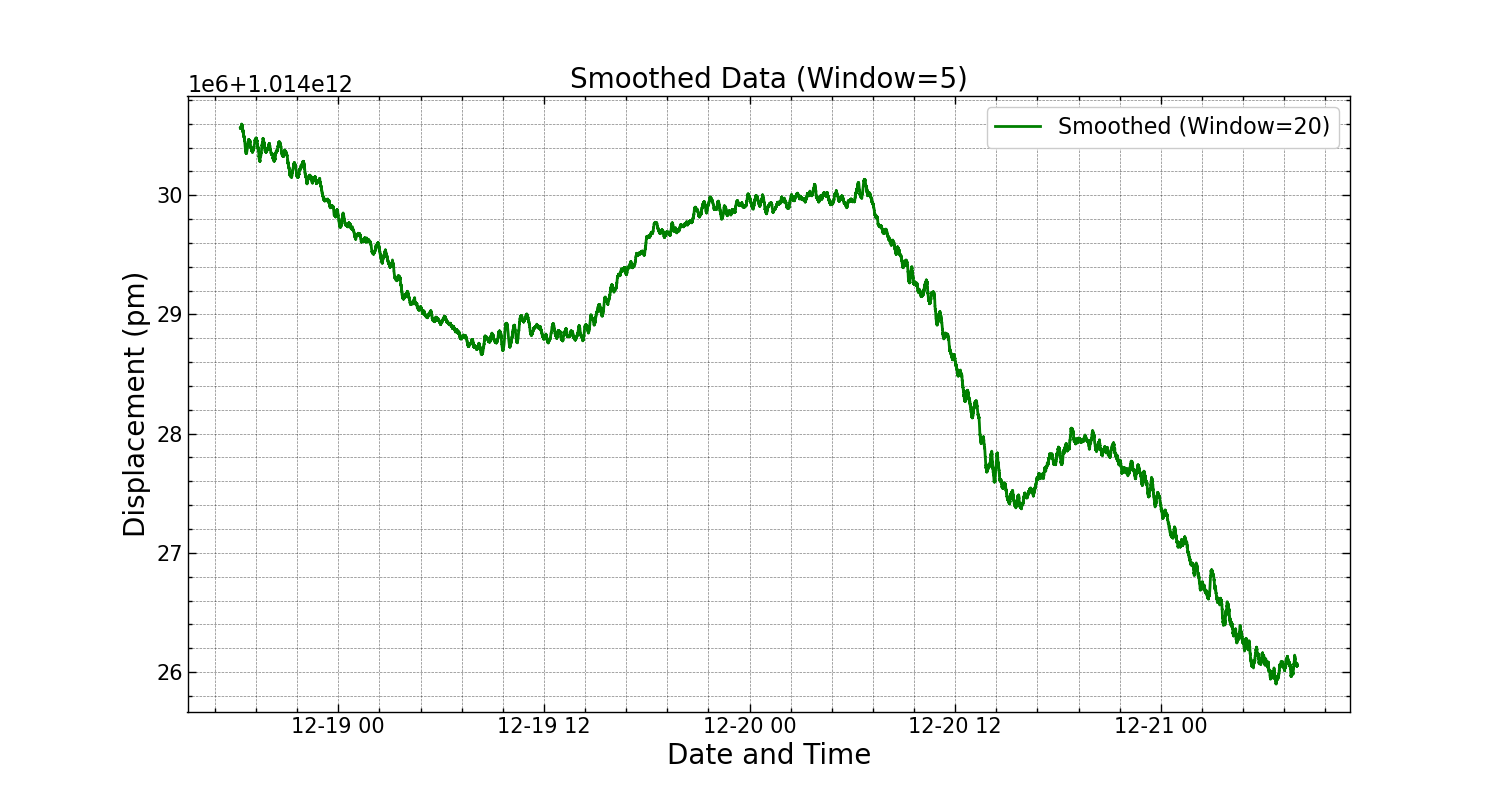

<IPython.core.display.Javascript object>


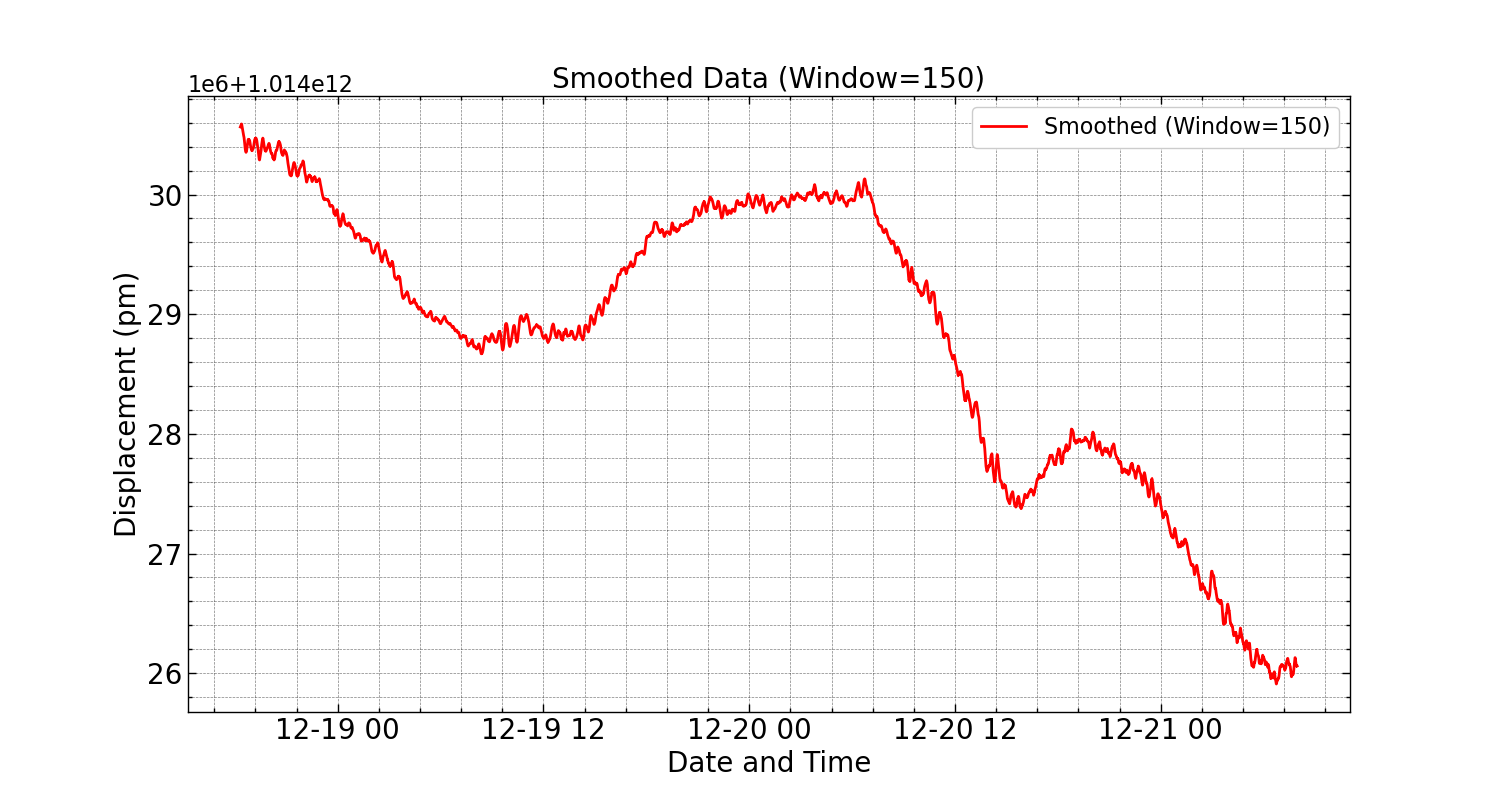

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("Experiment_outer_18_12_23_IDS+BME680_position.csv")

# Convert "Date" and "Time" columns to a combined datetime column
data['Date_Time'] = pd.to_datetime(data["Date"] + " " + data["Time"], format="%Y-%m-%d %H:%M:%S.%f")

# Set the start time
start_time = pd.to_datetime("18/12/2023 18:16:54.868", format="%d/%m/%Y %H:%M:%S.%f")

# Filter data based on the start time
data = data[data['Date_Time'] >= start_time]

# Extract Date, Time, and Position columns
date_time = data["Date_Time"]
position_cm = data["Position (cm)"]

# Convert position to nanometers
position_pm = position_cm * 1e10  # 1 cm = 1e10 pm

# Binning the data into 30-minute intervals
data['Date_Time_binned'] = date_time.dt.round('30min')

# Increase the figure size
plt.figure(figsize=(15, 8))

# Plot raw data as scatter plot
plt.scatter(date_time, position_pm, label='Raw Data', s=5, alpha=0.5)
plt.title('Raw Data (Scatter Plot)', fontsize=20)
plt.xlabel('Date and Time', fontsize=20)
plt.ylabel('Displacement (pm)', fontsize=20)
plt.grid(True, which='both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

# Plot raw data and overplot smoothed data with a window size of 20
plt.figure(figsize=(15, 8))
plt.scatter(date_time, position_pm, label='Raw Data', s=5, alpha=0.5)
smoothed_data_20 = position_pm.rolling(window=20).mean()
plt.plot(date_time, smoothed_data_20, label='Smoothed (Window=20)', color='orange')
plt.title('Raw Data with Overplotted Smoothed Data (Window=20)', fontsize=20)
plt.xlabel('Date and Time', fontsize=20)
plt.ylabel('Displacement (pm)', fontsize=20)
plt.grid(True, which='both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

# Plot smoothed data with filter value of 5
plt.figure(figsize=(15, 8))
smoothed_data_5 = position_pm.rolling(window=20).mean()
plt.plot(date_time, smoothed_data_5, label='Smoothed (Window=20)', color='green')
plt.title('Smoothed Data (Window=5)', fontsize=20)
plt.xlabel('Date and Time', fontsize=20)
plt.ylabel('Displacement (pm)', fontsize=20)
plt.grid(True, which='both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

# Plot smoothed data with filter value of 150
plt.figure(figsize=(15, 8))
smoothed_data_150 = position_pm.rolling(window=150).mean()
plt.plot(date_time, smoothed_data_150, label='Smoothed (Window=150)', color='red')
plt.title('Smoothed Data (Window=150)', fontsize=20)
plt.xlabel('Date and Time', fontsize=20)
plt.ylabel('Displacement (pm)', fontsize=20)
plt.grid(True, which='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


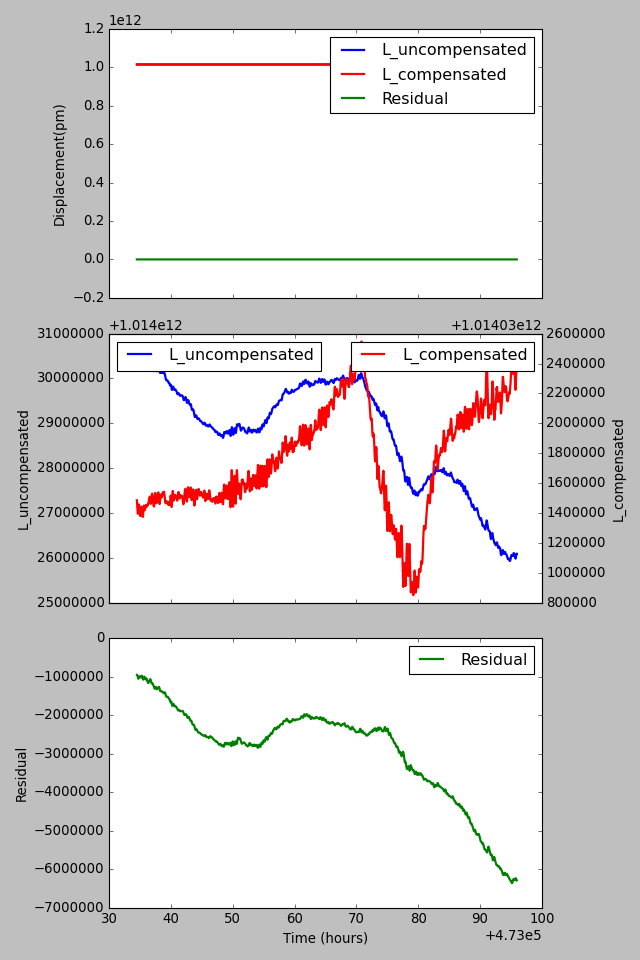

Standard Deviation of L_uncompensated: 1580456.0712489022
Standard Deviation of L_compensated: 880996.0434734973
Standard Deviation of Residual: 1313784.5440119854


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib notebook
plt.style.use('classic')

def load_data(file_path):
    return pd.read_csv(file_path)

def extract_date_time(df):
    return pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")

def convert_to_pm(position_cm):
    return position_cm * 1e10  # 1 cm = 1e10 pm

def calculate_calibrated_path(original_path, refractive_index_standard, refractive_index_air):
    return original_path * refractive_index_standard / refractive_index_air

def calculate_refractive_index(P, T, H):
    return 1 + ((7.83e-4 * P*0.1) / (273 + T)) - (1.5e-11 * H * (T ** 2 + 160)) # hpa to kpa: 1hpa = 0.1kpa

def plot_smoothed_paths(date_time, smoothed_original_path, smoothed_calibrated_path, residual, label_smoothed_original="L_uncompensated", label_smoothed_calibrated="L_compensated"):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

    # Convert date_time to hours
    hours = mdates.date2num(date_time) * 24

    # Plot all three in the same plot (overplot)
    ax1.plot(hours, smoothed_original_path, label=label_smoothed_original, linestyle='-', linewidth=2)
    ax1.plot(hours, smoothed_calibrated_path, label=label_smoothed_calibrated, linestyle='-', linewidth=2, color='red')
    ax1.plot(hours, residual, label="Residual", linestyle='-', linewidth=2, color='green')
    ax1.set_ylabel("Displacement(pm)")
    ax1.legend()

    # Plot L_compensated in Y left axis, L_uncompensated in the right y-axis
    ax2.plot(hours, smoothed_original_path, label=label_smoothed_original, linestyle='-', linewidth=2)
    ax2.set_ylabel("L_uncompensated")
    ax2.legend(loc="upper left")
    ax2b = ax2.twinx()
    ax2b.plot(hours, smoothed_calibrated_path, label=label_smoothed_calibrated, linestyle='-', linewidth=2, color='red')
    ax2b.set_ylabel("L_compensated")
    ax2b.legend(loc="upper right")

    # Plot residual in the top x-axis
    ax3.plot(hours, residual, label="Residual", linestyle='-', linewidth=2, color='green')
    ax3.set_xlabel("Time (hours)")
    ax3.set_ylabel("Residual")
    ax3.legend()

    plt.tight_layout()
    plt.show()

# Load data
position_data = load_data("Experiment_outer_18_12_23_IDS+BME680_position.csv")
environment_data = load_data('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv')

# Extract Date, Time, and Position columns from position data
date_time = extract_date_time(position_data)
position_cm = position_data["Position (cm)"]

# Convert position to nanometers
position_pm = convert_to_pm(position_cm)

# Calculate refractive index using environmental data
n_air = calculate_refractive_index(environment_data['Pressure(hPa)'], environment_data['Temperature(C)'], environment_data['Humidity(%rh)'])

# Refractive index of standard air
n_sa = 1.0002713938

# Calculate calibrated path length
calibrated_path = calculate_calibrated_path(position_pm, n_sa, n_air)

# Calculate residual
residual = position_pm - calibrated_path

## Interpolate to fill missing values and make lengths equal  
date_time_interpolated = pd.date_range(date_time.min(), date_time.max(), periods=len(date_time))
position_pm_interpolated = position_pm.interpolate(method='linear')
calibrated_path_interpolated = calibrated_path.interpolate(method='linear')
residual_interpolated = residual.interpolate(method='linear')

# Trim or pad to make lengths equal 
min_length = min(len(date_time_interpolated), len(position_pm_interpolated), len(calibrated_path_interpolated), len(residual_interpolated))
date_time_interpolated = date_time_interpolated[:min_length]
position_pm_interpolated = position_pm_interpolated[:min_length]
calibrated_path_interpolated = calibrated_path_interpolated[:min_length]
residual_interpolated = residual_interpolated[:min_length]

# Calculate standard deviation
std_dev_original = position_pm_interpolated.std()
std_dev_calibrated = calibrated_path_interpolated.std()
std_dev_residual = residual_interpolated.std()

# Extract the data for the specified time range (from 12:56 to 1:56)
start_time = pd.to_datetime("2023-12-18 18:30:24.748", format="%Y-%m-%d %H:%M:%S")
end_time = pd.to_datetime("2023-12-21 07:55:15.361", format="%Y-%m-%d %H:%M:%S")

selected_range = (date_time_interpolated >= start_time) & (date_time_interpolated <= end_time)
date_time_selected = date_time_interpolated[selected_range]
smoothed_original_path_selected = position_pm_interpolated.rolling(window=500, min_periods=1).mean()[selected_range]
smoothed_calibrated_path_selected = calibrated_path_interpolated.rolling(window=500, min_periods=1).mean()[selected_range]
residual_selected = residual_interpolated.rolling(window=500, min_periods=1).mean()[selected_range]

# Plot only the smoothed original and calibrated paths for the specified time range
plot_smoothed_paths(date_time_selected, smoothed_original_path_selected, smoothed_calibrated_path_selected, residual_selected)

print("Standard Deviation of L_uncompensated:", std_dev_original)
print("Standard Deviation of L_compensated:", std_dev_calibrated)
print("Standard Deviation of Residual:", std_dev_residual)

#plt.savefig("Seminar.pdf")


<IPython.core.display.Javascript object>


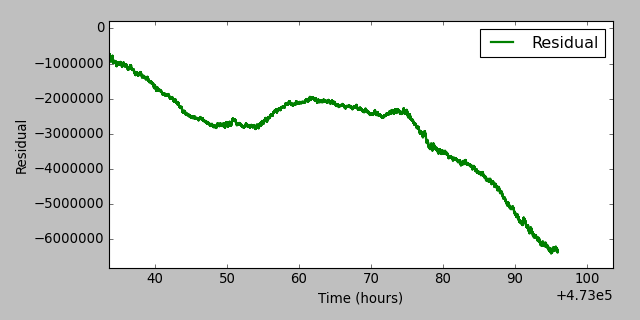

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib notebook
plt.style.use('classic')

def load_data(file_path):
    return pd.read_csv(file_path)

def extract_date_time(df):
    return pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")

def convert_to_pm(position_cm):
    return position_cm * 1e10  # 1 cm = 1e10 pm

def calculate_calibrated_path(original_path, refractive_index_standard, refractive_index_air):
    return original_path * refractive_index_standard / refractive_index_air

def calculate_refractive_index(P, T, H):
    return 1 + ((7.83e-4 * P*0.1) / (273 + T)) - (1.5e-11 * H * (T ** 2 + 160))  # hpa to kpa: 1hpa = 0.1kpa

# Load data
position_data = load_data("Experiment_outer_18_12_23_IDS+BME680_position.csv")
environment_data = load_data('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv')

# Extract Date, Time, and Position columns from position data
date_time = extract_date_time(position_data)
position_cm = position_data["Position (cm)"]

# Convert position to nanometers
position_pm = convert_to_pm(position_cm)

# Calculate refractive index using environmental data
n_air = calculate_refractive_index(environment_data['Pressure(hPa)'], environment_data['Temperature(C)'], environment_data['Humidity(%rh)'])

# Refractive index of standard air
n_sa = 1.0002713938

# Calculate calibrated path length
calibrated_path = calculate_calibrated_path(position_pm, n_sa, n_air)

# Calculate residual
residual = position_pm - calibrated_path

## Interpolate to fill missing values and make lengths equal  
date_time_interpolated = pd.date_range(date_time.min(), date_time.max(), periods=len(date_time))
residual_interpolated = residual.interpolate(method='linear')

# Trim or pad to make lengths equal 
min_length = min(len(date_time_interpolated), len(residual_interpolated))
date_time_interpolated = date_time_interpolated[:min_length]
residual_interpolated = residual_interpolated[:min_length]

# Plot the residual
fig, ax = plt.subplots(figsize=(8, 4))
hours = mdates.date2num(date_time_interpolated) * 24
ax.plot(hours, residual_interpolated, label="Residual", linestyle='-', linewidth=2, color='green')
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Residual")
ax.legend()
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib notebook
plt.style.use('classic')

def load_data(file_path):
    return pd.read_csv(file_path)

def extract_date_time(df):
    return pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")

def convert_to_pm(position_cm):
    return position_cm * 1e10  # 1 cm = 1e10 pm

def calculate_calibrated_path(original_path, refractive_index_standard, refractive_index_air):
    return original_path * refractive_index_standard / refractive_index_air

def calculate_refractive_index(P, T, H):
    return 1 + ((7.83e-4 * P*0.1) / (273 + T)) - (1.5e-11 * H * (T ** 2 + 160))  # hpa to kpa: 1hpa = 0.1kpa

def calculate_sensitivities(P, T, H):
    # Calculate refractive index for sensitivity calculations
    n_air = calculate_refractive_index(P, T, H)
    
    # Perturbation values for sensitivity calculations
    delta_T = 0.001  # perturbation in temperature (°C)
    delta_P = 0.6  # perturbation in pressure (kPa)
    delta_H = 0.03  # perturbation in humidity (%rh)

    # Calculate sensitivities using the central difference method
    dn_dT = (calculate_refractive_index(P, T + delta_T, H) - calculate_refractive_index(P, T - delta_T, H)) / (2 * delta_T)
    dn_dP = (calculate_refractive_index(P + delta_P, T, H) - calculate_refractive_index(P - delta_P, T, H)) / (2 * delta_P)
    dn_dRH = (calculate_refractive_index(P, T, H + delta_H) - calculate_refractive_index(P, T, H - delta_H)) / (2 * delta_H)

    return dn_dT, dn_dP, dn_dRH

def plot_smoothed_paths(date_time, smoothed_original_path, smoothed_calibrated_path, residual, label_smoothed_original="L_uncompensated", label_smoothed_calibrated="L_compensated"):
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Convert date_time to hours
    hours = mdates.date2num(date_time) * 24

    # Plot L_compensated on left y-axis
    ax1.plot(hours, smoothed_calibrated_path, label=label_smoothed_calibrated, linestyle='-', linewidth=2, color='red')
    ax1.set_ylabel("L_compensated")
    ax1.legend(loc="upper left")

    # Create a twin Axes sharing the xaxis for L_uncompensated on the right y-axis
    ax2 = ax1.twinx()
    ax2.plot(hours, smoothed_original_path, label=label_smoothed_original, linestyle='-', linewidth=2)
    ax2.set_ylabel("L_uncompensated")
    ax2.legend(loc="upper right")

    # Create a second twin Axes sharing the xaxis for the residual on the top x-axis
    ax3 = ax1.twiny()
    ax3.plot(residual, label="Residual", linestyle='-', linewidth=2, color='green')
    ax3.set_xlabel("Residual")
    ax3.legend()

    plt.xlabel("Time (hours)")
    plt.tight_layout()
    plt.show()

# Load data
position_data = load_data("Experiment_outer_18_12_23_IDS+BME680_position.csv")
environment_data = load_data('Experiment_outer_18_12_23_IDS+BME680_environment_Modified.csv')

# Extract Date, Time, and Position columns from position data
date_time = extract_date_time(position_data)
position_cm = position_data["Position (cm)"]

# Convert position to nanometers
position_pm = convert_to_pm(position_cm)

# Calculate refractive index using environmental data
n_air = calculate_refractive_index(environment_data['Pressure(hPa)'], environment_data['Temperature(C)'], environment_data['Humidity(%rh)'])

# Refractive index of standard air
n_sa = 1.0002713938

# Calculate calibrated path length
calibrated_path = calculate_calibrated_path(position_pm, n_sa, n_air)

# Calculate residual
residual = position_pm - calibrated_path

## Interpolate to fill missing values and make lengths equal  
date_time_interpolated = pd.date_range(date_time.min(), date_time.max(), periods=len(date_time))
position_pm_interpolated = position_pm.interpolate(method='linear')
calibrated_path_interpolated = calibrated_path.interpolate(method='linear')
residual_interpolated = residual.interpolate(method='linear')

# Trim or pad to make lengths equal 
min_length = min(len(date_time_interpolated), len(position_pm_interpolated), len(calibrated_path_interpolated), len(residual_interpolated))
date_time_interpolated = date_time_interpolated[:min_length]
position_pm_interpolated = position_pm_interpolated[:min_length]
calibrated_path_interpolated = calibrated_path_interpolated[:min_length]
residual_interpolated = residual_interpolated[:min_length]

# Extract the data for the specified time range (from 12:56 to 1:56)
start_time = pd.to_datetime("2023-12-18 18:30:24.748", format="%Y-%m-%d %H:%M:%S")
end_time = pd.to_datetime("2023-12-21 07:55:15.361", format="%Y-%m-%d %H:%M:%S")

selected_range = (date_time_interpolated >= start_time) & (date_time_interpolated <= end_time)
date_time_selected = date_time_interpolated[selected_range]
smoothed_original_path_selected = position_pm_interpolated.rolling(window=500, min_periods=1).mean()[selected_range]
smoothed_calibrated_path_selected = calibrated_path_interpolated.rolling(window=500, min_periods=1).mean()[selected_range]
residual_selected = residual_interpolated.rolling(window=500, min_periods=1).mean()[selected_range]

# Plot only the smoothed original and calibrated paths for the specified time range
plot_smoothed_paths(date_time_selected, smoothed_original_path_selected, smoothed_calibrated_path_selected)

# Calculate sensitivities
dn_dT, dn_dP, dn_dRH = calculate_sensitivities(environment_data['Pressure(hPa)'], environment_data['Temperature(C)'], environment_data['Humidity(%rh)'])

# Calculate average sensitivity
a = np.mean([dn_dT])
b = np.mean([dn_dP])
c = np.mean([dn_dRH])

print("Sensitivities:")
print(f"dn/dT: {a}")
print(f"dn/dP: {b}")
print(f"dn/dRH: {c}")


TypeError: plot_smoothed_paths() missing 1 required positional argument: 'residual'

In [19]:
# Calculate and print the mode and average of position_cm values in pm
mode_position = position_pm.mode().values[0]
average_position = position_pm.mean()
print(f"Mode of position_cm values in pm: {mode_position} pm")
print(f"Average of position_cm values in pm: {average_position} pm")


Mode of position_cm values in pm: 1014026069588.0001 pm
Average of position_cm values in pm: 1014028956836.1942 pm


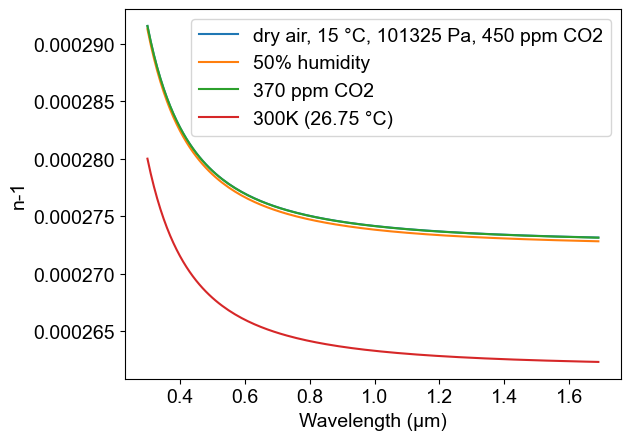

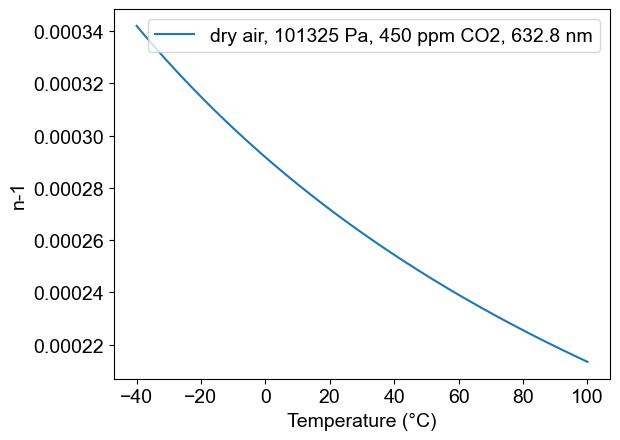

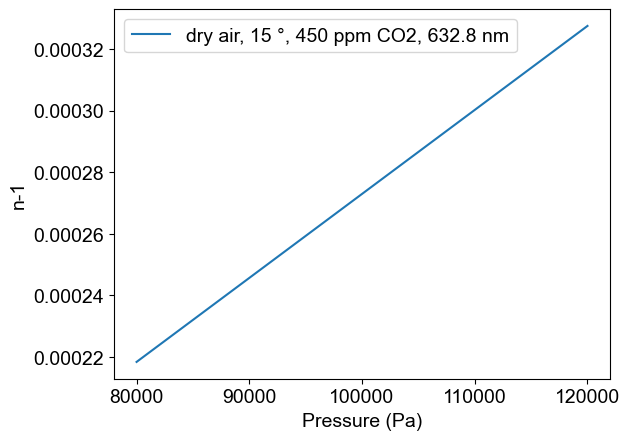

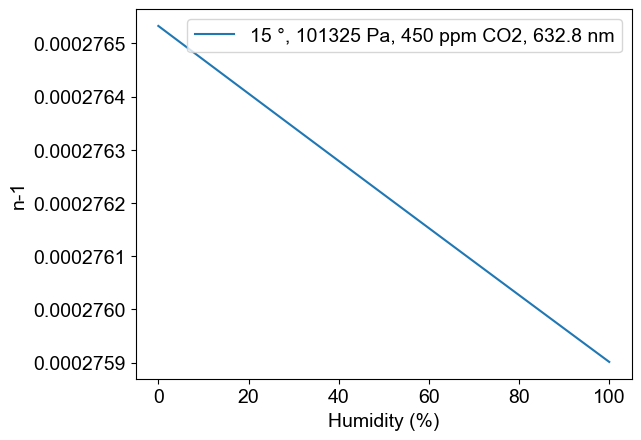

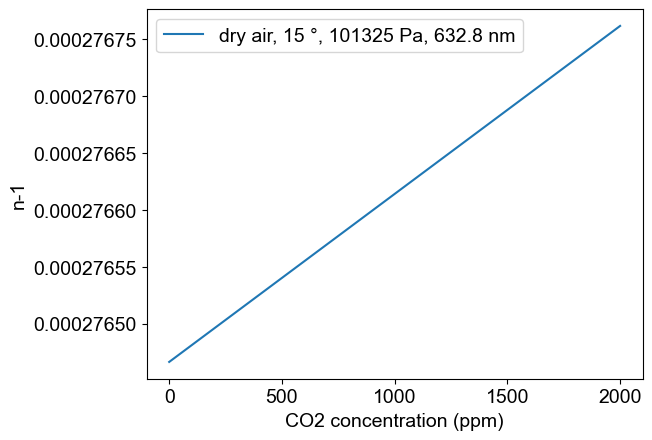

In [83]:
# -*- coding: utf-8 -*-
# Author: Mikhail Polyanskiy
# Last modified: 2017-11-23
# Original data: Ciddor 1996, https://doi.org/10.1364/AO.35.001566

###############################################################################

import numpy as np
import matplotlib.pyplot as plt
π = np.pi


def Z(T,p,xw): #compressibility
    t=T-273.15
    a0 = 1.58123e-6   #K·Pa^-1
    a1 = -2.9331e-8   #Pa^-1
    a2 = 1.1043e-10   #K^-1·Pa^-1
    b0 = 5.707e-6     #K·Pa^-1
    b1 = -2.051e-8    #Pa^-1
    c0 = 1.9898e-4    #K·Pa^-1
    c1 = -2.376e-6    #Pa^-1
    d  = 1.83e-11     #K^2·Pa^-2
    e  = -0.765e-8    #K^2·Pa^-2
    return 1-(p/T)*(a0+a1*t+a2*t**2+(b0+b1*t)*xw+(c0+c1*t)*xw**2) + (p/T)**2*(d+e*xw**2)


def n(λ,t,p,h,xc):
    # λ: wavelength, 0.3 to 1.69 μm 
    # t: temperature, -40 to +100 °C
    # p: pressure, 80000 to 120000 Pa
    # h: fractional humidity, 0 to 1
    # xc: CO2 concentration, 0 to 2000 ppm

    σ = 1/λ           #μm^-1
    
    T= t + 273.15     #Temperature °C -> K
    
    R = 8.314510      #gas constant, J/(mol·K)
    
    k0 = 238.0185     #μm^-2
    k1 = 5792105      #μm^-2
    k2 = 57.362       #μm^-2
    k3 = 167917       #μm^-2
 
    w0 = 295.235      #μm^-2
    w1 = 2.6422       #μm^-2
    w2 = -0.032380    #μm^-4
    w3 = 0.004028     #μm^-6
    
    A = 1.2378847e-5  #K^-2
    B = -1.9121316e-2 #K^-1
    C = 33.93711047
    D = -6.3431645e3  #K
    
    α = 1.00062
    β = 3.14e-8       #Pa^-1,
    γ = 5.6e-7        #°C^-2

    #saturation vapor pressure of water vapor in air at temperature T
    if(t>=0):
        svp = np.exp(A*T**2 + B*T + C + D/T) #Pa
    else:
        svp = 10**(-2663.5/T+12.537)
    
    #enhancement factor of water vapor in air
    f = α + β*p + γ*t**2
    
    #molar fraction of water vapor in moist air
    xw = f*h*svp/p
    
    #refractive index of standard air at 15 °C, 101325 Pa, 0% humidity, 450 ppm CO2
    nas = 1 + (k1/(k0-σ**2)+k3/(k2-σ**2))*1e-8
    
    #refractive index of standard air at 15 °C, 101325 Pa, 0% humidity, xc ppm CO2
    naxs = 1 + (nas-1) * (1+0.534e-6*(xc-450))
    
    #refractive index of water vapor at standard conditions (20 °C, 1333 Pa)
    nws = 1 + 1.022*(w0+w1*σ**2+w2*σ**4+w3*σ**6)*1e-8
    
    Ma = 1e-3*(28.9635 + 12.011e-6*(xc-400)) #molar mass of dry air, kg/mol
    Mw = 0.018015                            #molar mass of water vapor, kg/mol
    
    Za = Z(288.15, 101325, 0)                #compressibility of dry air
    Zw = Z(293.15, 1333, 1)                  #compressibility of pure water vapor
    
    #Eq.4 with (T,P,xw) = (288.15, 101325, 0)
    ρaxs = 101325*Ma/(Za*R*288.15)           #density of standard air
    
    #Eq 4 with (T,P,xw) = (293.15, 1333, 1)
    ρws  = 1333*Mw/(Zw*R*293.15)             #density of standard water vapor
    
    # two parts of Eq.4: ρ=ρa+ρw
    ρa   = p*Ma/(Z(T,p,xw)*R*T)*(1-xw)       #density of the dry component of the moist air    
    ρw   = p*Mw/(Z(T,p,xw)*R*T)*xw           #density of the water vapor component
    
    nprop = 1 + (ρa/ρaxs)*(naxs-1) + (ρw/ρws)*(nws-1)
    
    return nprop



# output - modify code below the line to match your needs
##############################################################################
    
#use this to calculate n at particular conditions
#print("n =",n(0.6328,15,101325,0,450))

#plot n vs μm
λ = np.arange(0.3, 1.691, 0.01)
n1 = n(λ,15,101325,0,450) #dry air, 15 °C, 450 ppm
n2 = n(λ,15,101325,0.5,450) #50% humidity, 15 °C, 450 ppm
n3 = n(λ,15,101325,0,370) #dry air, 15 °C, 370 ppm
n4 = n(λ,26.85,101325,0,450) #dry air, 300K, 450 ppm
plt.rc('font', family='Arial', size='14')
plt.figure(1)
plt.plot(λ, n1-1, label="dry air, 15 °C, 101325 Pa, 450 ppm CO2")
plt.plot(λ, n2-1, label="50% humidity")
plt.plot(λ, n3-1, label="370 ppm CO2")
plt.plot(λ, n4-1, label="300K (26.75 °C)")
plt.xlabel('Wavelength (μm)')
plt.ylabel('n-1')
plt.legend()

t = np.arange(-40, 100.1, 1)
n5 = [None] * len(t)
for i in range(0, len(t)):
    n5[i] = n(0.6328,t[i],101325,0,450)-1 #dry air, 450 ppm @ HeNe wavelength
plt.figure(2)
plt.plot(t, n5, label="dry air, 101325 Pa, 450 ppm CO2, 632.8 nm")
plt.xlabel('Temperature (°C)')
plt.ylabel('n-1')
plt.legend()

p = np.arange(80000, 120001, 250)
n6 = n(0.6328,15,p,0,450) #dry air, 15 °, 450 ppm @ HeNe wavelength
plt.figure(3)
plt.plot(p, n6-1, label="dry air, 15 °, 450 ppm CO2, 632.8 nm")
plt.xlabel('Pressure (Pa)')
plt.ylabel('n-1')
plt.legend()

h = np.arange(0, 1.001, 0.01)
n7 = n(0.6328, 15, 101325, h, 450) #dry air, 15 °, 450 ppm @ HeNe wavelength
plt.figure(4)
plt.plot(h*100, n7-1, label="15 °, 101325 Pa, 450 ppm CO2, 632.8 nm")
plt.xlabel('Humidity (%)')
plt.ylabel('n-1')
plt.legend()

xc = np.arange(0, 2001, 100)
n8 = n(0.6328, 15, 101325, 0, xc) #dry air, 15 °, 450 ppm @ HeNe wavelength
plt.figure(5)
plt.plot(xc, n8-1, label="dry air, 15 °, 101325 Pa, 632.8 nm")
plt.xlabel('CO2 concentration (ppm)')
plt.ylabel('n-1')
plt.legend()

In [4]:
!pip install allantools

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for allantools: filename=AllanTools-2019.9-py2.py3-none-any.whl size=40686 sha256=7f9f2ac89c25f1b330821db88a697f4e9e9c8b93e6c111015ff6b981ffe2a5fb
  Stored in directory: c:\users\biswa\appdata\local\pip\cache\wheels\85\87\3e\dd7d98cb8573ca653c6237ebcb1559ea484bcbbe8d838dcf73
Successfully built allantools


In [6]:
import allantools
import pylab as plt
import numpy as np
t = np.logspace(0, 3, 50)  # tau values from 1 to 1000
y = allantools.noise.white(10000)  # Generate some frequency data
r = 12.3  # sample rate in Hz of the input data
(t2, ad, ade, adn) = allantools.oadev(y, rate=r, data_type="freq", taus=t)  # Compute the overlapping ADEV
fig = plt.loglog(t2, ad) # Plot the results
plt.show()